In [1]:
# Make plots interactive and enable inline backend
%matplotlib inline

In [2]:
# Import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# View data sets to read
os.listdir("data")

['clinicaltrial_data.csv', 'mouse_drug_data.csv']

In [4]:
# Read data sets into Pandas DataFrames
clinical_data = pd.read_csv("data/clinicaltrial_data.csv")
mouse_data = pd.read_csv("data/mouse_drug_data.csv")

# Preview data frames
display(clinical_data.head(3))
mouse_data.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn


In [5]:
# Check number of rows and nulls in both DataFrames
display(clinical_data.count())
mouse_data.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

Mouse ID    250
Drug        250
dtype: int64

In [6]:
# Merge the two original DataFrames into a new single DataFrame containing all research data
all_data = pd.merge(clinical_data, mouse_data, how="left", on="Mouse ID")

# Preview DataFrame
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [7]:
# Calculate mean of "Tumor Volume (mm3)" grouped by "Drug" and "Timepoint" 
tumor_vol_mean = all_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to, and flatten, DataFrame
tumor_vol_mean = pd.DataFrame(tumor_vol_mean).reset_index()

# Preview DataFrame
tumor_vol_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [8]:
# Calculate standard error for "Tumor Volume (mm3)" grouped by "Drug" and "Timepoint" 
tumor_vol_stderr = all_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to, and flatten, DataFrame
tumor_vol_stderr = pd.DataFrame(tumor_vol_stderr).reset_index()

# Preview DataFrame
tumor_vol_stderr.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [9]:
# Pivot mean and stderr DataFrames
tumor_mean_pivot = tumor_vol_mean.pivot("Timepoint", "Drug", "Tumor Volume (mm3)")
tumor_stderr_pivot = tumor_vol_stderr.pivot("Timepoint", "Drug", "Tumor Volume (mm3)")

# Preview DataFrames
display(tumor_mean_pivot.head(3))
tumor_stderr_pivot.head(3)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949


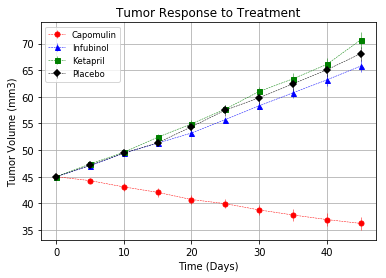

In [20]:
# Create figure and one subplot
fig, ax = plt.subplots()

# All scatter plots have same x-axis values so use this in all scatter plots
x_axis = tumor_mean_pivot.index


# Draw scatter plot
ax.errorbar(x_axis, tumor_mean_pivot["Capomulin"], yerr=tumor_stderr_pivot["Capomulin"], fmt="r--o", linewidth= 0.5,
           markersize=5)
ax.errorbar(x_axis, tumor_mean_pivot["Infubinol"], yerr=tumor_stderr_pivot["Infubinol"], fmt="b--^", linewidth= 0.5,
           markersize=5)
ax.errorbar(x_axis, tumor_mean_pivot["Ketapril"], yerr=tumor_stderr_pivot["Ketapril"], fmt="g--s", linewidth= 0.5,
           markersize=5)
ax.errorbar(x_axis, tumor_mean_pivot["Placebo"], yerr=tumor_stderr_pivot["Placebo"], fmt="k--D", linewidth= 0.5,
           markersize=5, markeredgewidth=0.1)

# Set the plot's title
plt.title("Tumor Response to Treatment")

# Set axes labels
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlabel("Time (Days)")

# Set a legend and grid
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()

# Save plot
# plt.savefig("images/tumor_treatments.jpg")

# Display plot
plt.show()

## Metastatic Response to Treatment

In [11]:
# Calculate mean for "Metastatic Sites" grouped by "Drug" and "Timepoint" 
meta_mean_group = all_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to, and flatten, DataFrame
meta_mean_df = pd.DataFrame(meta_mean_group).reset_index()

# Preview DataFrame
meta_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [12]:
# Calculate standard error for "Metastatic Sites" grouped by "Drug" and "Timepoint" 
meta_stderr_group = all_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to, and flatten, DataFrame
meta_stderr_df = pd.DataFrame(meta_stderr_group).reset_index()

# Preview DataFrame
meta_stderr_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [13]:
# Pivot mean and standard error DataFrames
meta_mean_pivot = meta_mean_df.pivot("Timepoint", "Drug", "Metastatic Sites")
meta_stderr_pivot = meta_stderr_df.pivot("Timepoint", "Drug", "Metastatic Sites")

# Preview DataFrames
display(meta_mean_pivot.head(3))
meta_stderr_pivot.head(3)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000
5,0.16,0.380952,0.280000,0.304348,0.26087,0.375000,0.320000,0.12,0.240000,0.166667
10,0.32,0.600000,0.666667,0.590909,0.52381,0.833333,0.565217,0.25,0.478261,0.500000


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109


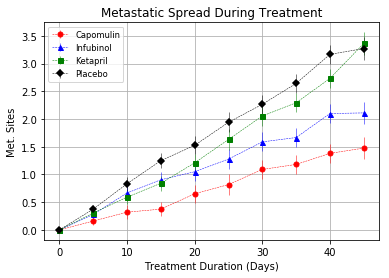

In [21]:
# Create figure and one subplot
fig, ax = plt.subplots()

# Draw scatter plot
ax.errorbar(x_axis, meta_mean_pivot["Capomulin"], yerr=meta_stderr_pivot["Capomulin"], fmt="r--o",
           linewidth=0.5, markersize=5)
ax.errorbar(x_axis, meta_mean_pivot["Infubinol"], yerr=meta_stderr_pivot["Capomulin"], fmt="b--^",
           linewidth=0.5, markersize=5)
ax.errorbar(x_axis, meta_mean_pivot["Ketapril"], yerr=meta_stderr_pivot["Capomulin"], fmt="g--s",
           linewidth=0.5, markersize=5)
ax.errorbar(x_axis, meta_mean_pivot["Placebo"], yerr=meta_stderr_pivot["Capomulin"], fmt="k--D",
           linewidth=0.5, markersize=5, markeredgewidth=0.1)

# Set the plot's title
plt.title("Metastatic Spread During Treatment")

# Set axes labels
ax.set_ylabel("Met. Sites")
ax.set_xlabel("Treatment Duration (Days)")

# Set a legend and grid
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()

# Save plot
# plt.savefig("images/metastatic_spread.jpg")
# Display plot  
plt.show()

## Create a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

In [16]:
# Calculate number of mice grouped by "Drug" and "Timepoint" 
mouse_count = all_data.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to, and flatten, DataFrame
mouse_count_df = pd.DataFrame({"Mouse Count": mouse_count}).reset_index()

# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Pivot mouse count DataFrame
mouse_count_pivot = mouse_count_df.pivot("Timepoint", "Drug", "Mouse Count")

# Preview DataFrame
mouse_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
